# Анализ текстовых данных. Часть 1

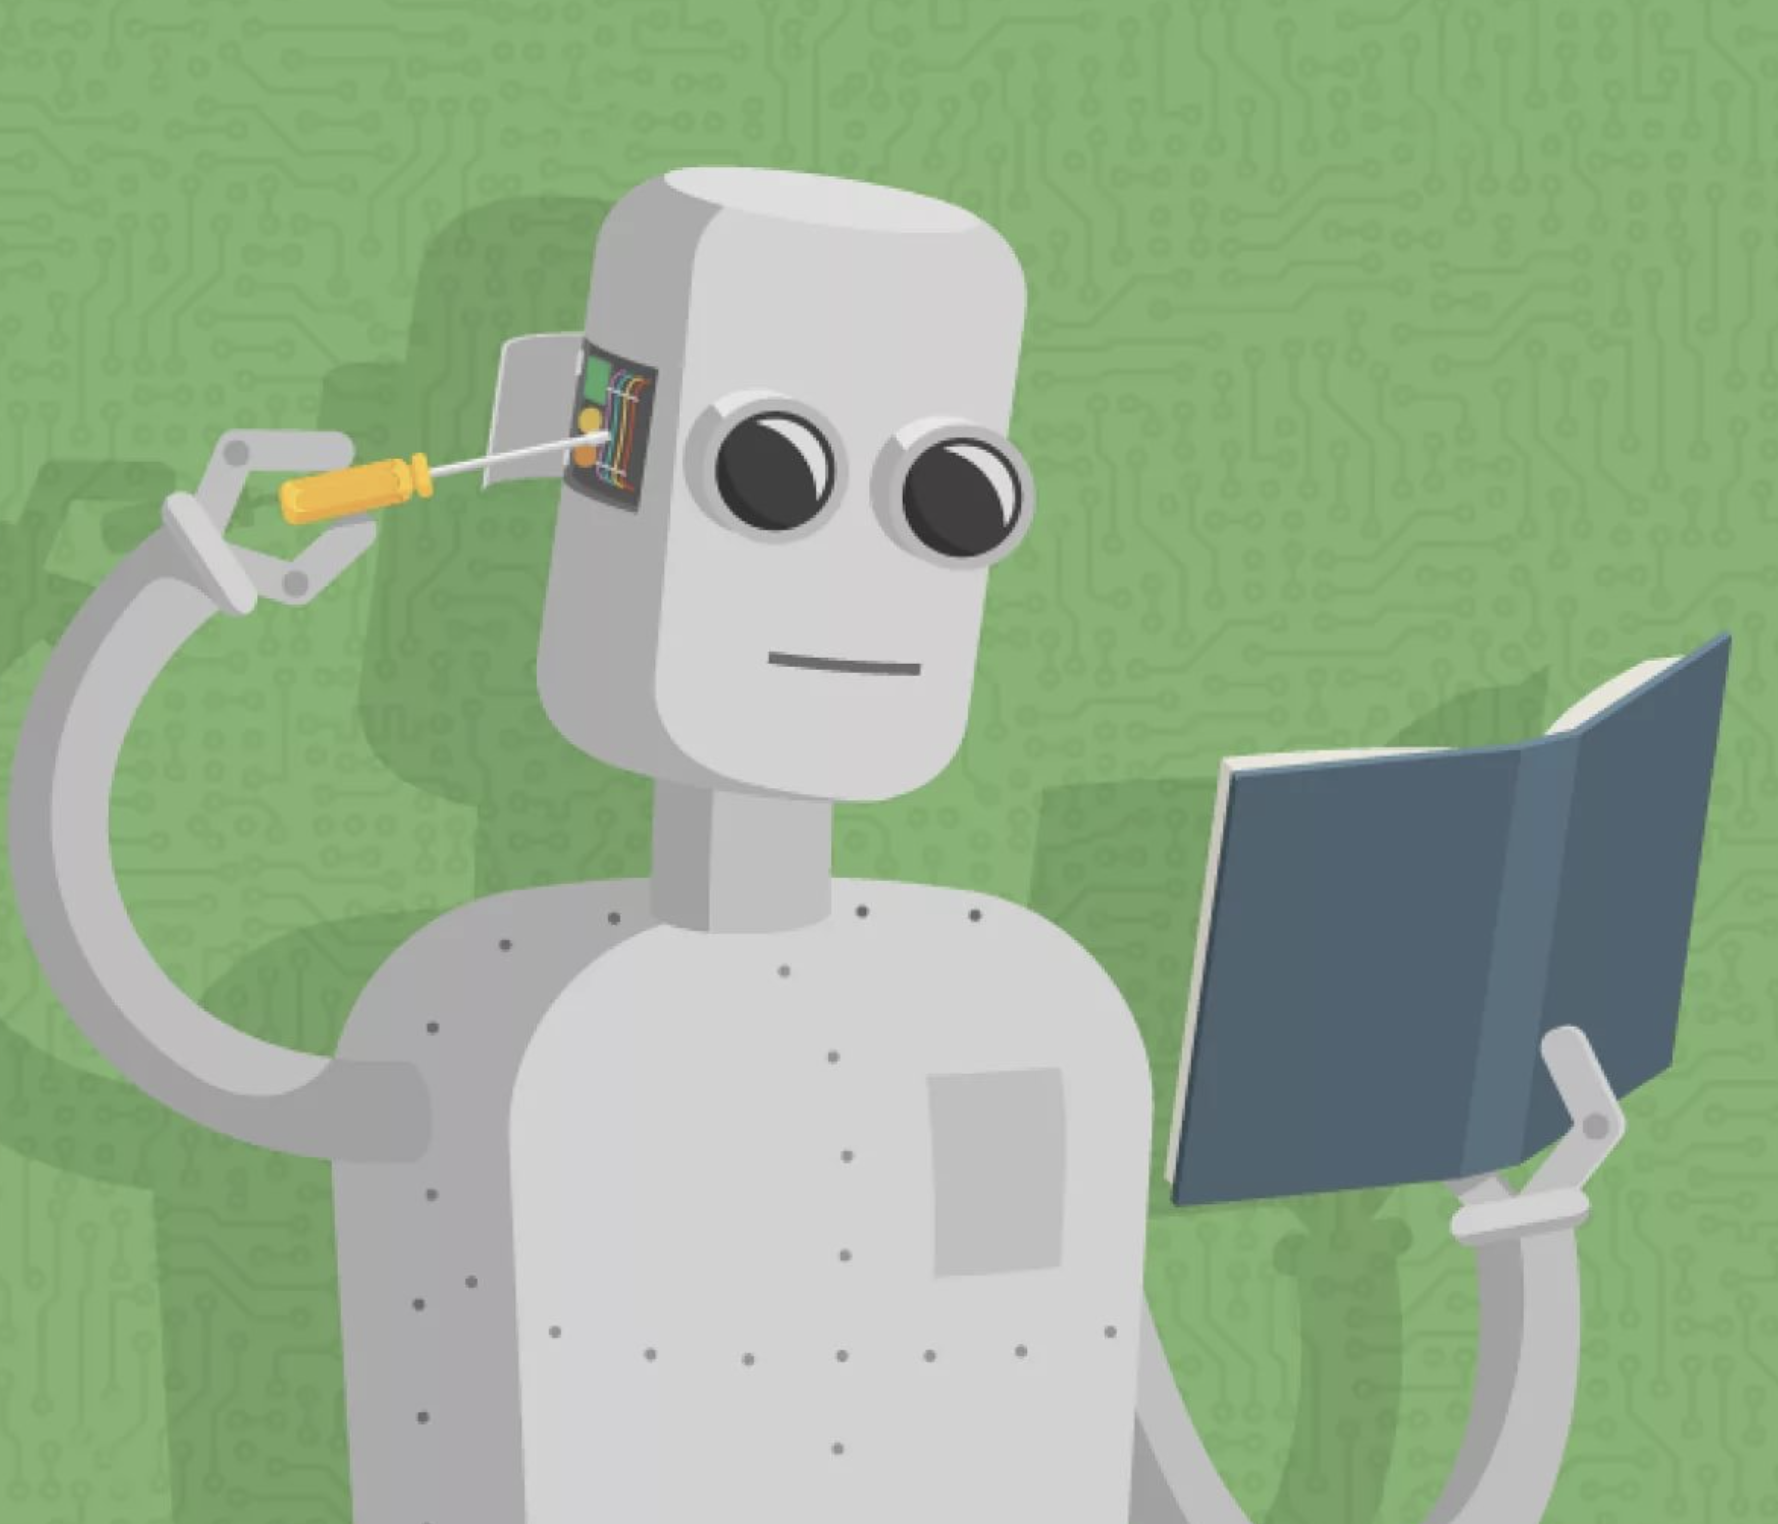

### Какие задачи можно решать, обрабатывая текст?

1. синтаксические задачи
  * разметка по частям речи и по морфологическим признакам
  * деление слов в тексте на морфемы (суффикс, приставка и пр.)
  * стемминг, лемматизация -- приведение к базовой форме
  * деление на предложения (инициалы и сокращения) и слова (китайский язык)
  * поиск имен и названий в тексте - сущностей (named entity recognition)
  * разрешение смысла слов в заданном контексте (замок/замок)
  * построить синтаксическое дерево
  * определение того, к каким другим объектам относится слово
2. задачи на понимание текста, в которых есть "учитель"
  * предсказание следующего символа
  * информационный поиск
  * анализ тональности
  * выделение отношений и фактов
  * ответы на вопросы
3. понимание и порождение текста 
  * порождение текста
  * машинный перевод
  * диалоговые модели (чат-бот)
  
Косвенные задачи:
  * описание изображения
  * распознавание речи
  
**Задачи бизнеса**:
  * распознавание речи (помощник)
  * чат-бот (замена техподдержки в решении большинства вопросов)
  * поиск точного ответа на вопрос в базе документов (например, база стандартов)
  * оценка мнения в социальных сетях о продукте
  * ... (ваши варианты?)

![Gmail](https://habrastorage.org/webt/ec/rw/ii/ecrwii6nml6c6uvxn8vensihku0.gif "gmail")

# От текста к простым моделям

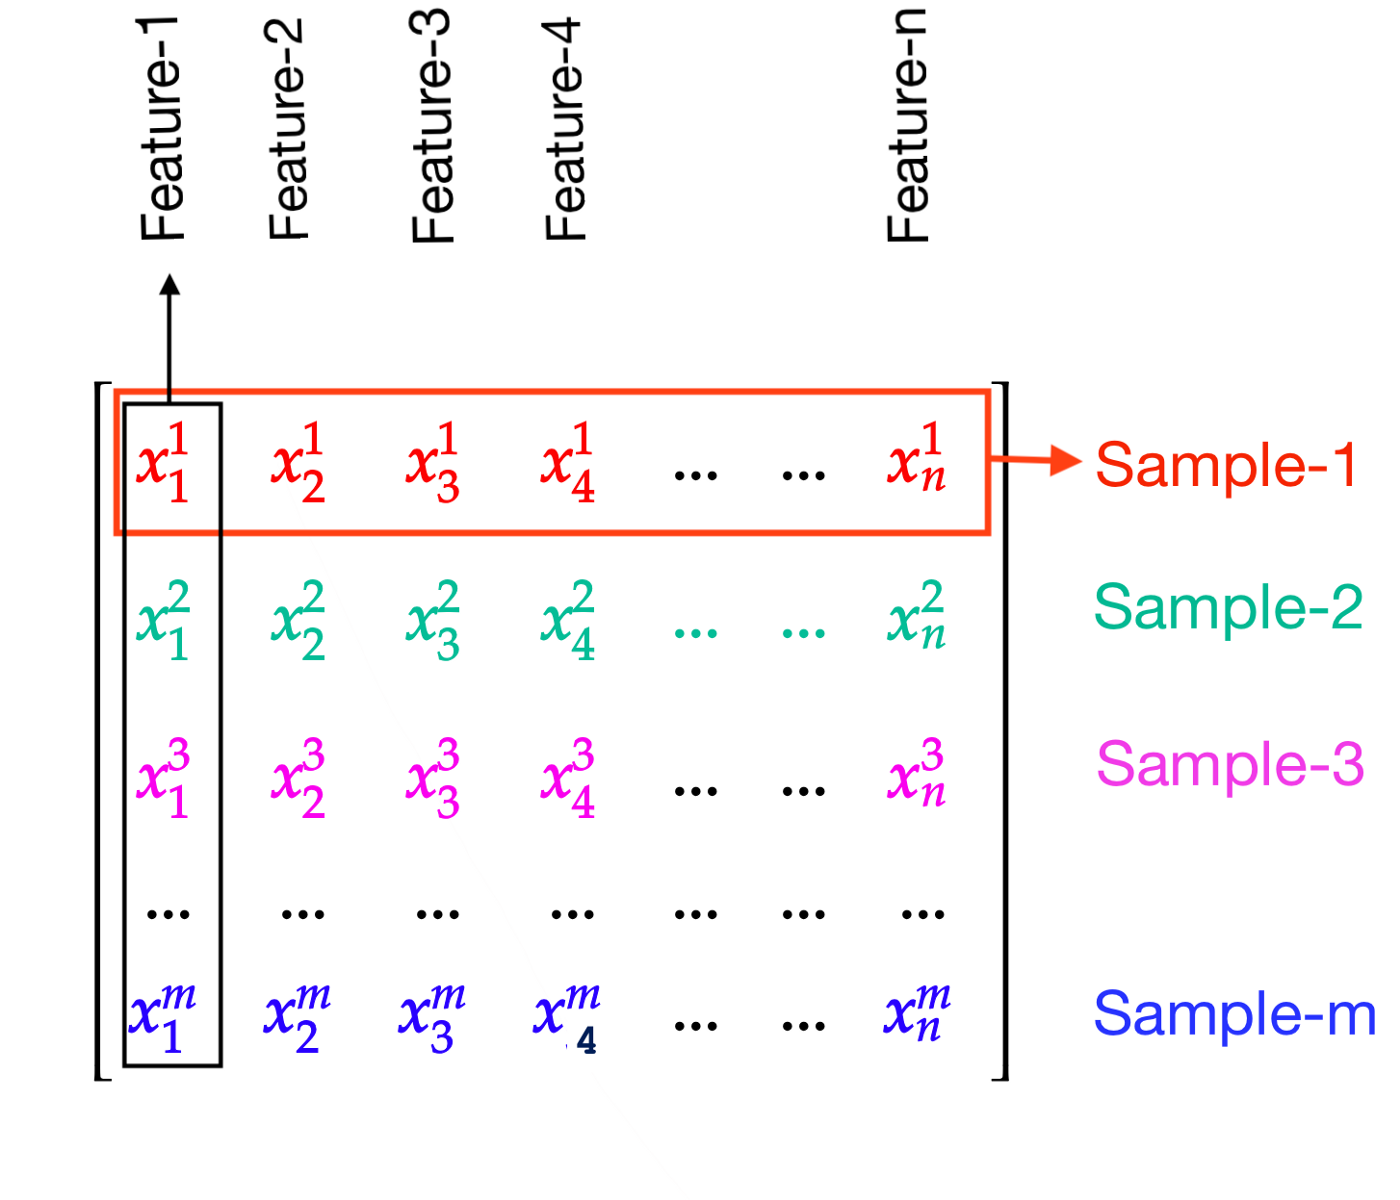

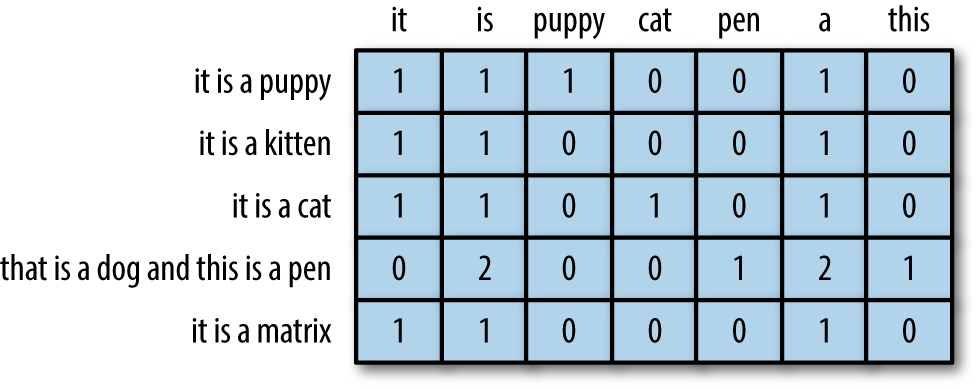

## Разбиение на токены
**Def.**  
разбиение последовательности символов на части (токены), возможно, исключая из рассмотрения некоторые символы  
Наивный подход: разделить строку пробелами и выкинуть знаки препинания  


*Трисия любила Нью-Йорк, поскольку любовь к Нью-Йорку могла положительно повлиять на ее карьеру.*  

In [2]:
import re

In [3]:
s = 'Трисия любила Нью-Йорк, поскольку любовь к Нью-Йорку могла положительно повлиять на ее карьеру.'
re.findall('\w+|[^\w\s]+', s)

['Трисия',
 'любила',
 'Нью',
 '-',
 'Йорк',
 ',',
 'поскольку',
 'любовь',
 'к',
 'Нью',
 '-',
 'Йорку',
 'могла',
 'положительно',
 'повлиять',
 'на',
 'ее',
 'карьеру',
 '.']

In [ ]:
# Какие могут быть проблемы?

In [4]:
s2 = 'Пиши на мой почтоый ящик my.email@mail.ru'

In [5]:
re.findall('\w+|[^\w\s]+', s2)

['Пиши',
 'на',
 'мой',
 'почтоый',
 'ящик',
 'my',
 '.',
 'email',
 '@',
 'mail',
 '.',
 'ru']

**Проблемы:**  
* my.email@mail.ru, 127.0.0.1
* С++, C#
* York University vs New York University
* Зависимость от языка (“Lebensversicherungsgesellschaftsangestellter”, “l’amour”)
Альтернатива: n-граммы

In [6]:
import nltk
# nltk.download('')  # download lots of data

In [7]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|[^\w\s]+') 

In [8]:
tokenizer.tokenize(s)

['Трисия',
 'любила',
 'Нью',
 '-',
 'Йорк',
 ',',
 'поскольку',
 'любовь',
 'к',
 'Нью',
 '-',
 'Йорку',
 'могла',
 'положительно',
 'повлиять',
 'на',
 'ее',
 'карьеру',
 '.']

In [9]:
tokens = nltk.word_tokenize(s)
tokens

['Трисия',
 'любила',
 'Нью-Йорк',
 ',',
 'поскольку',
 'любовь',
 'к',
 'Нью-Йорку',
 'могла',
 'положительно',
 'повлиять',
 'на',
 'ее',
 'карьеру',
 '.']

#### Russian tokenization

In [10]:
from razdel import tokenize

In [11]:
razdel_tokens = list(tokenize(s))
razdel_tokens

[Substring(0, 6, 'Трисия'),
 Substring(7, 13, 'любила'),
 Substring(14, 22, 'Нью-Йорк'),
 Substring(22, 23, ','),
 Substring(24, 33, 'поскольку'),
 Substring(34, 40, 'любовь'),
 Substring(41, 42, 'к'),
 Substring(43, 52, 'Нью-Йорку'),
 Substring(53, 58, 'могла'),
 Substring(59, 71, 'положительно'),
 Substring(72, 80, 'повлиять'),
 Substring(81, 83, 'на'),
 Substring(84, 86, 'ее'),
 Substring(87, 94, 'карьеру'),
 Substring(94, 95, '.')]

## Удаляем пунктуацию

In [12]:
import string

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
tokens

['Трисия',
 'любила',
 'Нью-Йорк',
 ',',
 'поскольку',
 'любовь',
 'к',
 'Нью-Йорку',
 'могла',
 'положительно',
 'повлиять',
 'на',
 'ее',
 'карьеру',
 '.']

In [15]:
tokens = [x for x in tokens if x not in string.punctuation]
tokens

['Трисия',
 'любила',
 'Нью-Йорк',
 'поскольку',
 'любовь',
 'к',
 'Нью-Йорку',
 'могла',
 'положительно',
 'повлиять',
 'на',
 'ее',
 'карьеру']

## ftfy: fixes text for you

In [ ]:
u'\001\033[36;44mI&#x92;m blue, da ba dee da ba doo&#133;\033[0m'

In [16]:
from ftfy import fix_text
print(fix_text(u'\001\033[36;44mI&#x92;m blue, da ba dee da ba doo&#133;\033[0m', normalization='NFKC'))

I'm blue, da ba dee da ba doo...


## Стоп-слова

Наиболее частые слова в языке, не содержащие никакой информации о содержании текста

In [17]:
from nltk.corpus import stopwords

In [18]:
len(stopwords.words())

6800

In [19]:
len(stopwords.words('russian'))

151

In [20]:
len(stopwords.words('english'))

179

In [21]:
len(stopwords.words('french'))

157

In [22]:
print (' '.join(stopwords.words('russian')[:20]))
print (' '.join(stopwords.words('english')[:20]))

и в во не что он на я с со как а то все она так его но да ты
i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his


In [23]:
tokens = [x for x in tokens if x not in stopwords.words('russian')]
tokens

['Трисия',
 'любила',
 'Нью-Йорк',
 'поскольку',
 'любовь',
 'Нью-Йорку',
 'могла',
 'положительно',
 'повлиять',
 'карьеру']

## Нормализация

Приведение токенов к единому виду для того, чтобы избавиться от поверхностной разницы в написании  

Подходы  
* сформулировать набор правил, по которым преобразуется токен  
Нью-Йорк → нью-йорк → ньюйорк → ньюиорк
* явно хранить связи между токенами (WordNet – Princeton)  
машина → автомобиль, Windows 6→ window

In [25]:
'машина'=='Машина'.lower()

True

In [26]:
'Машина'.lower()

'машина'

In [27]:
s = 'Нью-Йорк'
s1 = s.lower()
print(s1)

нью-йорк


In [28]:
import re
s2 = re.sub("\W", "", s1)
print(s2)

ньюйорк


In [29]:
s3 = re.sub("й", u"и", s2)
print(s3)

ньюиорк


In [30]:
tokens = [x.lower() for x in tokens]
tokens

['трисия',
 'любила',
 'нью-йорк',
 'поскольку',
 'любовь',
 'нью-йорку',
 'могла',
 'положительно',
 'повлиять',
 'карьеру']

## Стемминг и Лемматизация

Приведение грамматических форм слова и однокоренных слов к единой основе (lemma):

* Stemming – с помощью простых эвристических правил

    *Сте́мминг (англ. stemming — находить происхождение) — это процесс нахождения основы слова для заданного исходного слова.*
  
  *Стемминг – это грубый эвристический процесс, который отрезает «лишнее» от корня слов, часто это приводит к потере словообразовательных суффиксов.*

  * Porter (Cambridge – 1980)
        5 этапов, на каждом применяется набор правил, таких как
            sses → ss (caresses → caress)
            ies → i (ponies → poni)

  * Lovins (1968)
  * Paice (1990)
  * другие
  
* Lemmatization – с использованием словарей и морфологического анализа

    *Лемматиза́ция — процесс приведения словоформы к лемме — её нормальной (словарной) форме.*

## Стемминг

TODO: процесс стемминга

In [31]:
from nltk.stem.snowball import PorterStemmer
s = PorterStemmer()
print(s.stem('Tokenization')) #Todo
print(s.stem('stemming'))

token
stem


In [32]:
print(s.stem('learning'))

learn


In [33]:
s.stem('национальный')

'национальный'

In [34]:
print(s.stem('better'))

better


In [35]:
s.stem('unsubscribe')

'unsubscrib'

In [36]:
from nltk.stem.snowball import RussianStemmer
r = RussianStemmer()
print(r.stem('Авиация'))
print(r.stem('национальный'))

авиац
национальн


In [37]:
r.stem('машинное')

'машин'

In [38]:
r.stem('обучение')

'обучен'

In [39]:
r.stem('обучения')

'обучен'

In [40]:
r.stem('обучаться')

'обуча'

In [41]:
r.stem('переобучение')

'переобучен'

In [42]:
tokens

['трисия',
 'любила',
 'нью-йорк',
 'поскольку',
 'любовь',
 'нью-йорку',
 'могла',
 'положительно',
 'повлиять',
 'карьеру']

In [43]:
[r.stem(x) for x in tokens]

['трис',
 'люб',
 'нью-йорк',
 'поскольк',
 'любов',
 'нью-йорк',
 'могл',
 'положительн',
 'повлия',
 'карьер']

## Лемматизация 
(обычно лучше работает для сложных языков, в том числе для русского)

### pymorphy2

https://pymorphy2.readthedocs.io/en/stable/user/guide.html

При морфологическом анализе не используется информация о соседних словах.

In [44]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
for i in morph.parse(u'замок'):
    print("Metadata: {}".format(i))
    print("Word: {} | Normal form: {}".format(i.word, i.normal_form))
    print('\n')

Metadata: Parse(word='замок', tag=OpencorporaTag('NOUN,inan,masc sing,nomn'), normal_form='замок', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, 'замок', 139, 0),))
Word: замок | Normal form: замок


Metadata: Parse(word='замок', tag=OpencorporaTag('NOUN,inan,masc sing,accs'), normal_form='замок', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, 'замок', 139, 3),))
Word: замок | Normal form: замок


Metadata: Parse(word='замок', tag=OpencorporaTag('VERB,perf,intr masc,sing,past,indc'), normal_form='замокнуть', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, 'замок', 730, 1),))
Word: замок | Normal form: замокнуть




In [45]:
tokens

['трисия',
 'любила',
 'нью-йорк',
 'поскольку',
 'любовь',
 'нью-йорку',
 'могла',
 'положительно',
 'повлиять',
 'карьеру']

In [46]:
[morph.normal_forms(x)[0] for x in tokens]

['трисия',
 'любить',
 'нью-йорк',
 'поскольку',
 'любовь',
 'нью-йорк',
 'мочь',
 'положительно',
 'повлиять',
 'карьер']

In [47]:
morph.normal_forms('карьеру')

['карьер', 'карьера']

### pymystem3

In [48]:
from pymystem3 import Mystem
mystem = Mystem()

In [49]:
[mystem.lemmatize(x)[0] for x in tokens]

['трисия',
 'любить',
 'нью-йорк',
 'поскольку',
 'любовь',
 'нью-йорк',
 'мочь',
 'положительно',
 'повлиять',
 'карьера']

In [50]:
mystem.lemmatize('карьеру')

['карьера', '\n']

https://github.com/natasha/natasha

In [52]:
from natasha import MorphVocab, Doc, Segmenter, NewsEmbedding, NewsMorphTagger

In [53]:
morph_vocab = MorphVocab()
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

In [54]:
s = 'Трисия любила Нью-Йорк, поскольку любовь к Нью-Йорку могла положительно повлиять на ее карьеру.'

In [55]:
doc = Doc(s)
doc

Doc(text='Трисия любила Нью-Йорк, поскольку любовь к Нью-Йо...)

In [56]:
doc.segment(segmenter)

In [57]:
print(doc.tokens[:5])

[DocToken(stop=6, text='Трисия'), DocToken(start=7, stop=13, text='любила'), DocToken(start=14, stop=22, text='Нью-Йорк'), DocToken(start=22, stop=23, text=','), DocToken(start=24, stop=33, text='поскольку')]


In [58]:
doc.tag_morph(morph_tagger)

In [59]:
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [60]:
print(doc.tokens)

[DocToken(stop=6, text='Трисия', pos='PROPN', feats=<Anim,Nom,Fem,Sing>, lemma='трисия'), DocToken(start=7, stop=13, text='любила', pos='VERB', feats=<Imp,Fem,Ind,Sing,Past,Fin,Act>, lemma='любить'), DocToken(start=14, stop=22, text='Нью-Йорк', pos='PROPN', feats=<Inan,Acc,Masc,Sing>, lemma='нью-йорк'), DocToken(start=22, stop=23, text=',', pos='PUNCT', lemma=','), DocToken(start=24, stop=33, text='поскольку', pos='SCONJ', lemma='поскольку'), DocToken(start=34, stop=40, text='любовь', pos='NOUN', feats=<Inan,Nom,Fem,Sing>, lemma='любовь'), DocToken(start=41, stop=42, text='к', pos='ADP', lemma='к'), DocToken(start=43, stop=52, text='Нью-Йорку', pos='PROPN', feats=<Inan,Dat,Masc,Sing>, lemma='нью-йорк'), DocToken(start=53, stop=58, text='могла', pos='VERB', feats=<Imp,Fem,Ind,Sing,Past,Fin,Act>, lemma='мочь'), DocToken(start=59, stop=71, text='положительно', pos='ADV', feats=<Pos>, lemma='положительно'), DocToken(start=72, stop=80, text='повлиять', pos='VERB', feats=<Perf,Inf,Act>, lemm

In [61]:
{_.text: _.lemma for _ in doc.tokens}

{'Трисия': 'трисия',
 'любила': 'любить',
 'Нью-Йорк': 'нью-йорк',
 ',': ',',
 'поскольку': 'поскольку',
 'любовь': 'любовь',
 'к': 'к',
 'Нью-Йорку': 'нью-йорк',
 'могла': 'мочь',
 'положительно': 'положительно',
 'повлиять': 'повлиять',
 'на': 'на',
 'ее': 'ее',
 'карьеру': 'карьера',
 '.': '.'}

## Представление документов

**Boolean Model.** Присутствие или отсутствие слова в документе  
**Bag of Words.** Порядок токенов не важен  

Что еще можно добавить в мешок слов?

*Погода была ужасная, принцесса была прекрасная.
Или все было наоборот?*

#### DictVectorizer

In [62]:
from sklearn.feature_extraction import DictVectorizer

In [63]:
dvectorizer = DictVectorizer(sparse=False)
text_dict = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = dvectorizer.fit_transform(text_dict)
X.shape
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [64]:
import pandas as pd

In [65]:
pd.DataFrame(X, columns=dvectorizer.feature_names_)

bar  baz  foo
0  2.0  0.0  1.0
1  0.0  1.0  3.0

In [66]:
dvectorizer.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [67]:
dvectorizer.transform({'foo': 4, 'unseen_feature': 3})

array([[0., 0., 4.]])

In [68]:
from collections import Counter

In [69]:
Counter([1, 1, 2, 3, 4, 4])

Counter({1: 2, 2: 1, 3: 1, 4: 2})

In [70]:
docs = [
    "Thank you, Mr President.",
    "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
    "Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.",
]

tokenizer = RegexpTokenizer('\w+|[^\w\s]+')
stopwords_eng = stopwords.words('english')

document_bags = list()

for d in docs:
    bag = Counter()
    text = d.lower()
    for t in tokenizer.tokenize(text):     
        if t in stopwords_eng or t in string.punctuation:
            continue
        bag[t] += 1
    document_bags.append(bag)
    
document_bags

[Counter({'thank': 1, 'mr': 1, 'president': 1}),
 Counter({'madam': 1,
          'president': 1,
          'agree': 1,
          'recognise': 1,
          'turkey': 2,
          'european': 1,
          'prospects': 2,
          'auspicious': 1,
          'outcome': 1,
          'needs': 1}),
 Counter({'madam': 1,
          'president': 1,
          'firstly': 1,
          'would': 1,
          'like': 1,
          'express': 1,
          'sincerest': 1,
          'thanks': 1,
          'high': 1,
          'representative': 1,
          'including': 1,
          'important': 1,
          'issue': 1,
          'agenda': 1,
          'early': 1,
          'stage': 1})]

In [71]:
dvectorizer.fit_transform(document_bags)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
        1., 2., 1., 0., 0., 0., 0., 0., 2., 0.],
       [1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 0., 1., 0., 1.]])

In [72]:
dvectorizer.feature_names_

['agenda',
 'agree',
 'auspicious',
 'early',
 'european',
 'express',
 'firstly',
 'high',
 'important',
 'including',
 'issue',
 'like',
 'madam',
 'mr',
 'needs',
 'outcome',
 'president',
 'prospects',
 'recognise',
 'representative',
 'sincerest',
 'stage',
 'thank',
 'thanks',
 'turkey',
 'would']

In [73]:
pd.DataFrame(dvectorizer.fit_transform(document_bags), columns=dvectorizer.feature_names_)

agenda  agree  auspicious  early  european  express  firstly  high  \
0     0.0    0.0         0.0    0.0       0.0      0.0      0.0   0.0   
1     0.0    1.0         1.0    0.0       1.0      0.0      0.0   0.0   
2     1.0    0.0         0.0    1.0       0.0      1.0      1.0   1.0   

   important  including  ...  president  prospects  recognise  representative  \
0        0.0        0.0  ...        1.0        0.0        0.0             0.0   
1        0.0        0.0  ...        1.0        2.0        1.0             0.0   
2        1.0        1.0  ...        1.0        0.0        0.0             1.0   

   sincerest  stage  thank  thanks  turkey  would  
0        0.0    0.0    1.0     0.0     0.0    0.0  
1        0.0    0.0    0.0     0.0     2.0    0.0  
2        1.0    1.0    0.0     1.0     0.0    1.0  

[3 rows x 26 columns]

In [74]:
docs

['Thank you, Mr President.',
 "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
 'Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.']

#### CountVectorizer

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
sklearn_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))

In [77]:
bow = sklearn_vectorizer.fit_transform(docs)

In [78]:
bow

<3x25 sparse matrix of type '<class 'numpy.int64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [79]:
bow.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
         0, 1, 0, 0],
        [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0,
         0, 0, 0, 2],
        [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
         1, 0, 1, 0]], dtype=int64)

In [80]:
sklearn_vectorizer.vocabulary_

{'thank': 22,
 'mr': 13,
 'president': 16,
 'madam': 12,
 'agree': 1,
 'recognise': 18,
 'turkey': 24,
 'european': 4,
 'prospects': 17,
 'auspicious': 2,
 'outcome': 15,
 'needs': 14,
 'firstly': 6,
 'like': 11,
 'express': 5,
 'sincerest': 20,
 'thanks': 23,
 'high': 7,
 'representative': 19,
 'including': 9,
 'important': 8,
 'issue': 10,
 'agenda': 0,
 'early': 3,
 'stage': 21}

In [82]:
docs

['Thank you, Mr President.',
 "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
 'Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.']

In [81]:
pd.DataFrame(
    sklearn_vectorizer.fit_transform(docs).todense(), 
    columns=sklearn_vectorizer.get_feature_names()) 

agenda  agree  auspicious  early  european  express  firstly  high  \
0       0      0           0      0         0        0        0     0   
1       0      1           1      0         1        0        0     0   
2       1      0           0      1         0        1        1     1   

   important  including  ...  outcome  president  prospects  recognise  \
0          0          0  ...        0          1          0          0   
1          0          0  ...        1          1          2          1   
2          1          1  ...        0          1          0          0   

   representative  sincerest  stage  thank  thanks  turkey  
0               0          0      0      1       0       0  
1               0          0      0      0       0       2  
2               1          1      1      0       1       0  

[3 rows x 25 columns]

## n-граммы

In [87]:
sklearn_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,2))
sklearn_vectorizer.fit_transform(docs)

<3x26 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [84]:
docs

['Thank you, Mr President.',
 "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
 'Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.']

In [88]:
list(sklearn_vectorizer.vocabulary_.keys())

['thank mr',
 'mr president',
 'madam president',
 'president agree',
 'agree recognise',
 'recognise turkey',
 'turkey european',
 'european prospects',
 'prospects prospects',
 'prospects auspicious',
 'auspicious outcome',
 'outcome turkey',
 'turkey needs',
 'president firstly',
 'firstly like',
 'like express',
 'express sincerest',
 'sincerest thanks',
 'thanks high',
 'high representative',
 'representative including',
 'including important',
 'important issue',
 'issue agenda',
 'agenda early',
 'early stage']

In [89]:
pd.DataFrame(
    sklearn_vectorizer.fit_transform(docs).todense(), 
    columns=sklearn_vectorizer.get_feature_names()) 

agenda early  agree recognise  auspicious outcome  early stage  \
0             0                0                   0            0   
1             0                1                   1            0   
2             1                0                   0            1   

   european prospects  express sincerest  firstly like  high representative  \
0                   0                  0             0                    0   
1                   1                  0             0                    0   
2                   0                  1             1                    1   

   important issue  including important  ...  president firstly  \
0                0                    0  ...                  0   
1                0                    0  ...                  0   
2                1                    1  ...                  1   

   prospects auspicious  prospects prospects  recognise turkey  \
0                     0                    0                 0   
1                     1                    1                 1   
2                     0                    0                 0   

   representative including  sincerest thanks  thank mr  thanks high  \
0                         0                 0         1            0   
1                         0                 0         0            0   
2                         1                 1         0            1   

   turkey european  turkey needs  
0                0             0  
1                1             1  
2                0             0  

[3 rows x 26 columns]

вернуться в презентацию

## TF-IDF

Количество вхождений слова $t$ в документе $d$
$$
TF_{t,d} = term\!\!-\!\!frequency(t, d)
$$
Количество документов из $N$ возможных, где встречается $t$
$$
DF_t = document\!\!-\!\!fequency(t)
$$
$$
IDF_t = inverse\!\!-\!\!document\!\!-\!\!frequency(t) = \log \frac{N}{DF_t}
$$
TF-IDF
$$
TF\!\!-\!\!IDF_{t,d} = TF_{t,d} \times IDF_t
$$

Оценивает важность слова в контексте документа, являющегося частью корпуса

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

In [90]:
docs = [
    "Thank you, Mr President.",
    "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
    "Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.",
]

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', norm=None)
features = vectorizer.fit_transform(docs).todense()
features

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.69314718, 0.        ,
         0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.69314718, 0.        , 0.        ],
        [0.        , 1.69314718, 1.69314718, 0.        , 1.69314718,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.28768207, 0.        , 1.69314718,
         1.69314718, 1.        , 3.38629436, 1.69314718, 0.        ,
         0.        , 0.        , 0.        , 0.        , 3.38629436],
        [1.69314718, 0.        , 0.        , 1.69314718, 0.        ,
         1.69314718, 1.69314718, 1.69314718, 1.69314718, 1.69314718,
         1.69314718, 1.69314718, 1.28768207, 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 1.69314718,
         1.69314718, 1.69314718,

In [93]:
vectorizer.vocabulary_

{'thank': 22,
 'mr': 13,
 'president': 16,
 'madam': 12,
 'agree': 1,
 'recognise': 18,
 'turkey': 24,
 'european': 4,
 'prospects': 17,
 'auspicious': 2,
 'outcome': 15,
 'needs': 14,
 'firstly': 6,
 'like': 11,
 'express': 5,
 'sincerest': 20,
 'thanks': 23,
 'high': 7,
 'representative': 19,
 'including': 9,
 'important': 8,
 'issue': 10,
 'agenda': 0,
 'early': 3,
 'stage': 21}

In [94]:
docs

['Thank you, Mr President.',
 "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
 'Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.']

In [95]:
pd.DataFrame(
    vectorizer.fit_transform(docs).todense(), 
    columns=vectorizer.get_feature_names()
) # сравнить outcome и prospects

agenda     agree  auspicious     early  european   express   firstly  \
0  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  1.693147    1.693147  0.000000  1.693147  0.000000  0.000000   
2  1.693147  0.000000    0.000000  1.693147  0.000000  1.693147  1.693147   

       high  important  including  ...   outcome  president  prospects  \
0  0.000000   0.000000   0.000000  ...  0.000000        1.0   0.000000   
1  0.000000   0.000000   0.000000  ...  1.693147        1.0   3.386294   
2  1.693147   1.693147   1.693147  ...  0.000000        1.0   0.000000   

   recognise  representative  sincerest     stage     thank    thanks  \
0   0.000000        0.000000   0.000000  0.000000  1.693147  0.000000   
1   1.693147        0.000000   0.000000  0.000000  0.000000  0.000000   
2   0.000000        1.693147   1.693147  1.693147  0.000000  1.693147   

     turkey  
0  0.000000  
1  3.386294  
2  0.000000  

[3 rows x 25 columns]

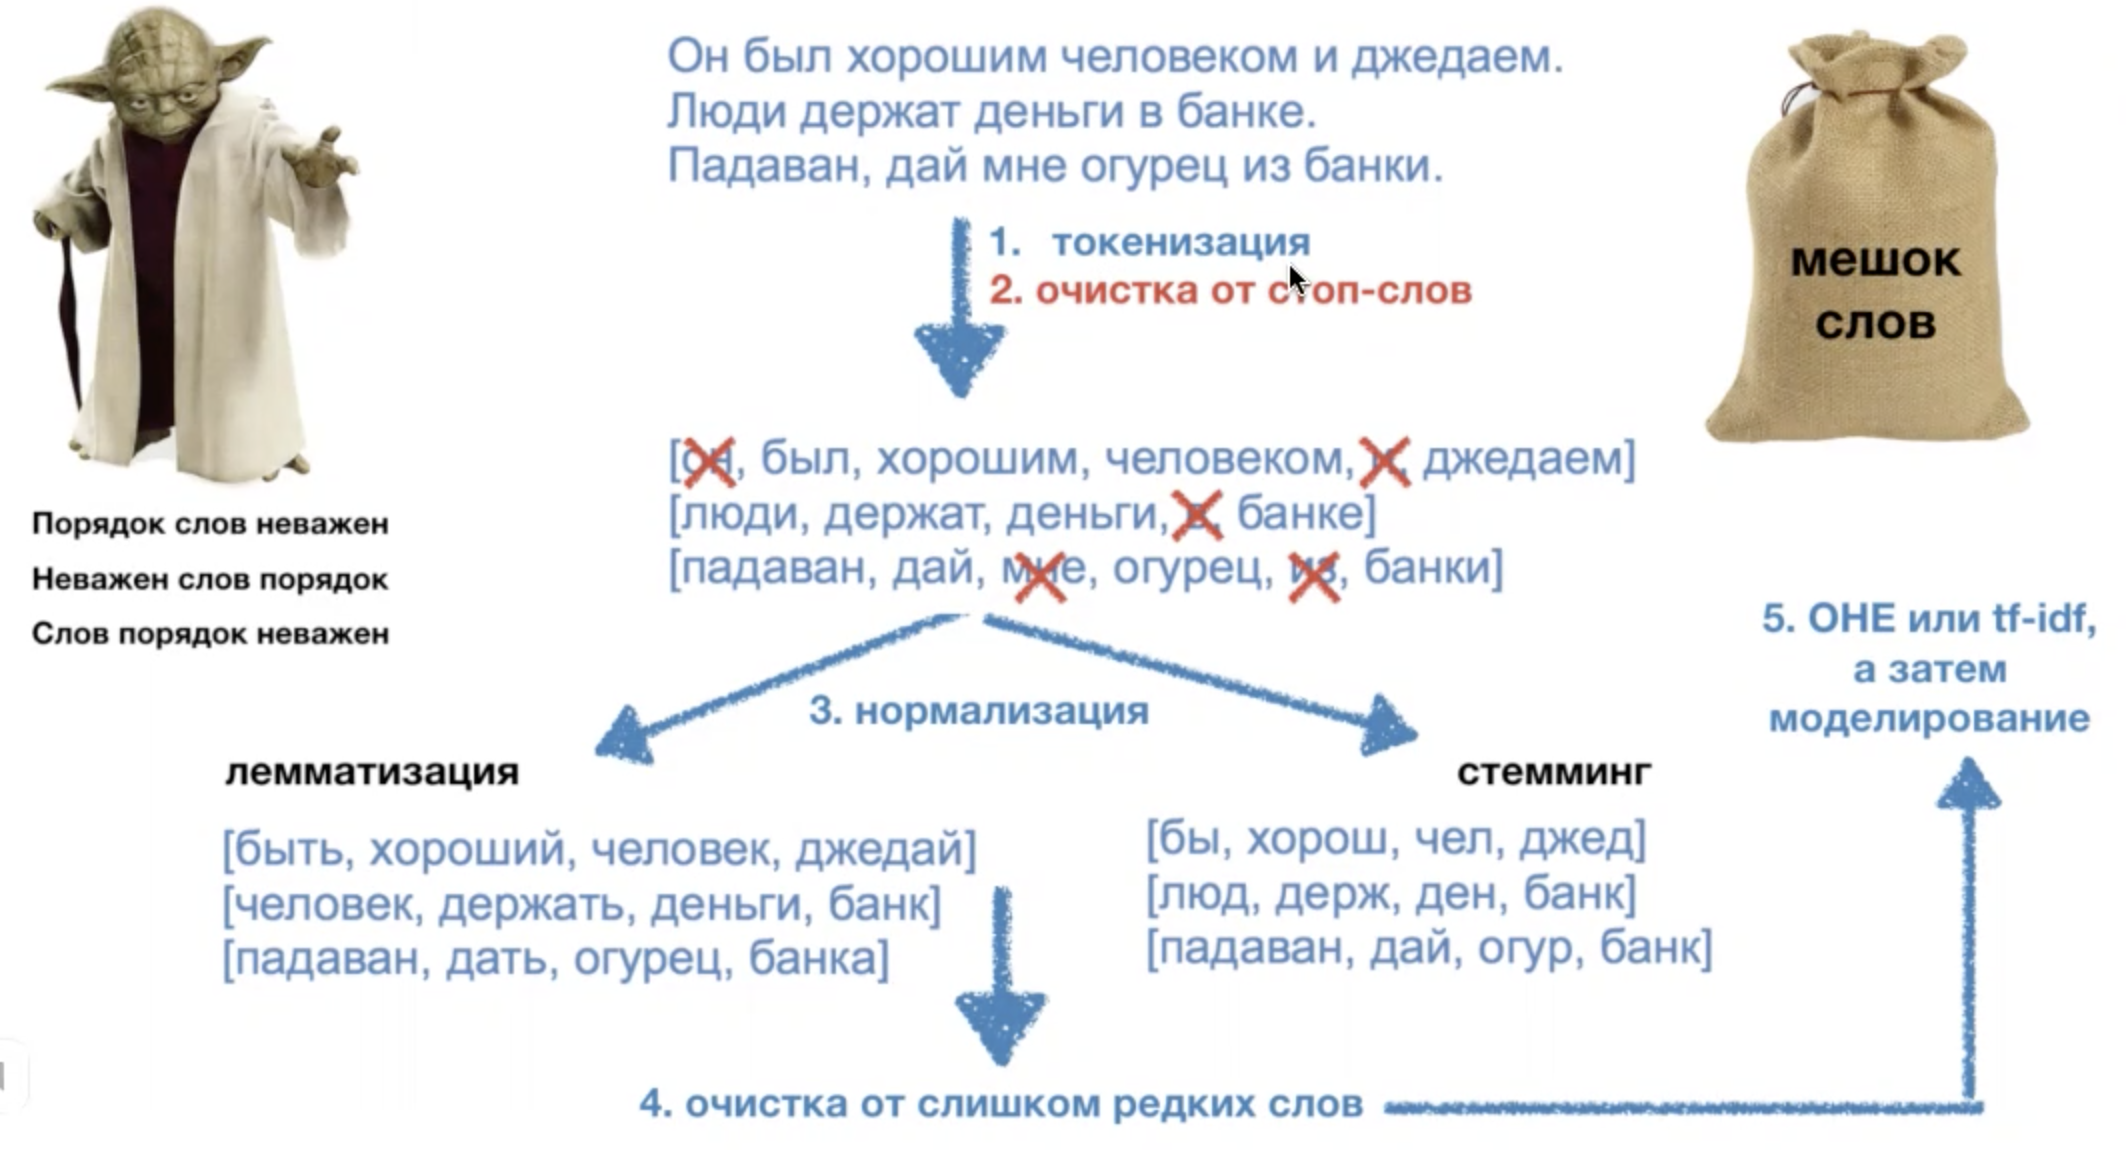

https://habr.com/ru/company/Voximplant/blog/446738/

https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/ch04.html